In [1]:
import os
import tensorflow as tf #tf 2.0.0
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_dir = os.path.join('/content/drive/MyDrive/Colab Notebooks/restes/dataset/Putri Navia Splited')

test_data_gen = ImageDataGenerator(rescale=1./255)

Batch_size = 64
img_h = 224
img_w = 224
num_classes=40

classes = ['A full',
 'A half',
 'A seper16',
 'A seper4',
 'A seper8',
 'B full',
 'B half',
 'B seper16',
 'B seper4',
 'B seper8',
 'C full',
 'C half',
 'C seper16',
 'C seper4',
 'C seper8',
 "C' full",
 "C' half",
 "C' seper16",
 "C' seper4",
 "C' seper8",
 'D full',
 'D half',
 'D seper16',
 'D seper4',
 'D seper8',
 'E full',
 'E half',
 'E seper16',
 'E seper4',
 'E seper8',
 'F full',
 'F half',
 'F seper16',
 'F seper4',
 'F seper8',
 'G full',
 'G half',
 'G seper16',
 'G seper4',
 'G seper8'
           ]

In [4]:
SEED = 1234
tf.random.set_seed(SEED) 

#test
test_dir = os.path.join(dataset_dir, 'Test')
test_gen = test_data_gen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=10, 
                                             shuffle=False,
                                             classes=classes,
                                             class_mode='categorical',
                                             seed=SEED)



Found 146 images belonging to 40 classes.


# Testing Custom

In [14]:
from sklearn.datasets import load_files
from keras.utils import np_utils
import numpy as np

def load_dataset(path):
    data = load_files(path)
    paths = np.array(data['filenames'])
    targets = np_utils.to_categorical(np.array(data['target']))
    return paths, targets

test_files, test_targets = load_dataset('/content/drive/MyDrive/Colab Notebooks/restes/dataset/Putri Navia Splited/Test')

In [15]:
from tensorflow.keras.preprocessing import image  
# from tensorflow.keras.applications.inception_v3 import preprocess_input
# from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

from tqdm import tqdm

def path_to_tensor(img_path):
    #load image, resize ke ukuran 224,224
    img = image.load_img(img_path, target_size=(224, 224))
    #convert gambar jadi 3D tensor (224,224,3)
    x = image.img_to_array(img).astype(np.float32)/255
    # x = image.img_to_array(img)
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

test_tensors = (paths_to_tensor(test_files))


100%|██████████| 173/173 [00:00<00:00, 298.46it/s]


18/18 [==============================] - 7s 213ms/step - loss: 6.7419 - accuracy: 0.6994

Testing loss: 6.7419
Testing accuracy: 0.6994


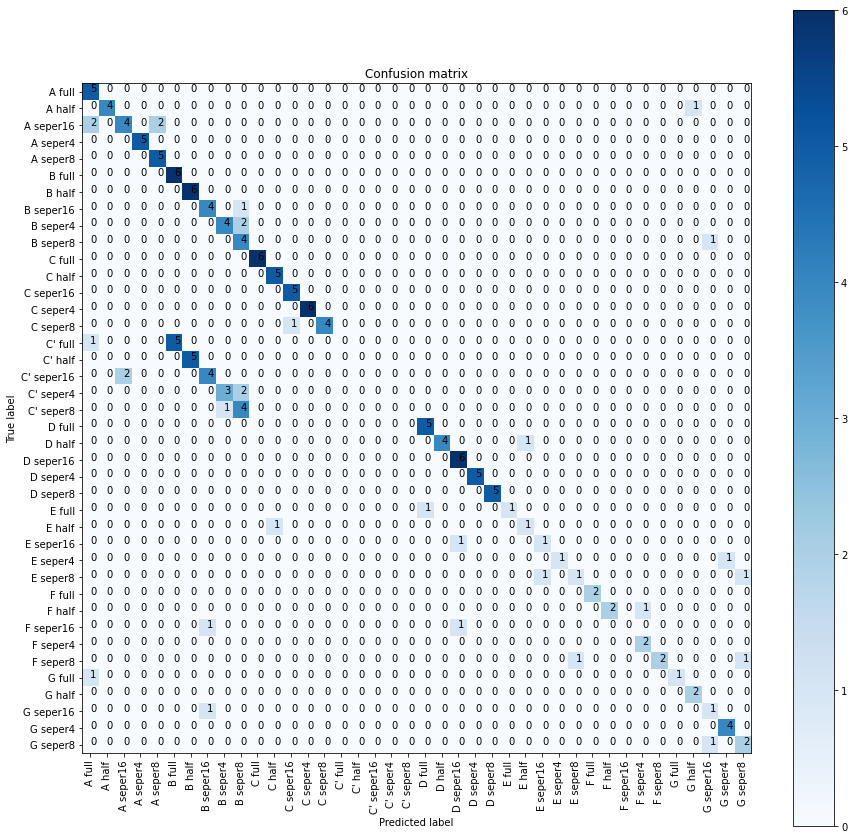

In [16]:
from tensorflow.keras.models import load_model


model = load_model('/content/drive/MyDrive/Colab Notebooks/restes/Hasil Training/best_model.h5')
result = print('\nTesting loss: {:.4f}\nTesting accuracy: {:.4f}'.format(*model.evaluate(test_tensors, test_targets, batch_size=test_gen.batch_size)))

from sklearn.metrics import confusion_matrix
import numpy as np

fig, ax = plt.subplots(figsize=(15, 15))
cm_labels = ['A full', 'A half', 'A seper16', 'A seper4', 'A seper8', 'B full', 'B half', 'B seper16', 'B seper4', 'B seper8', 'C full', 'C half', 'C seper16', 'C seper4', 'C seper8', "C' full", "C' half", "C' seper16", "C' seper4", "C' seper8", 'D full', 'D half', 'D seper16', 'D seper4', 'D seper8', 'E full', 'E half', 'E seper16', 'E seper4', 'E seper8', 'F full', 'F half', 'F seper16', 'F seper4', 'F seper8', 'G full', 'G half', 'G seper16', 'G seper4', 'G seper8']

cm = confusion_matrix(np.argmax(test_targets, axis=1),
                      np.argmax(model.predict(test_tensors), axis=1))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
indexes = np.arange(len(cm_labels))
for i in indexes:
    for j in indexes:
        plt.text(j, i, cm[i, j])
plt.xticks(indexes, cm_labels, rotation=90)
plt.xlabel('Predicted label')
plt.yticks(indexes, cm_labels)
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.grid(False)
plt.show()

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.models import load_model

from tensorflow.keras import backend as K

test_dir = '/content/drive/MyDrive/Colab Notebooks/restes/dataset/Putri Navia Splited/Test'

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size= 1,
        class_mode='categorical',
        shuffle=False)

model_resnet152 = load_model('/content/drive/MyDrive/Colab Notebooks/restes/Hasil Training/best_model.h5')

#Confusion Matrix and Classification Report
Y_pred_resnet152 = model_resnet152.predict_generator(test_generator, test_generator.samples // test_generator.batch_size)
y_pred_resnet152 = np.argmax(Y_pred_resnet152, axis=1)


print('Confusion Matrix ResNet152')
print(confusion_matrix(test_generator.classes, y_pred_resnet152))
print('Classification Report')
target_names = ['A full', 'A half', 'A seper16', 'A seper4', 'A seper8', 'B full', 'B half', 'B seper16', 'B seper4', 'B seper8', 'C full', 'C half', 'C seper16', 'C seper4', 'C seper8', "C' full", "C' half", "C' seper16", "C' seper4", "C' seper8", 'D full', 'D half', 'D seper16', 'D seper4', 'D seper8', 'E full', 'E half', 'E seper16', 'E seper4', 'E seper8', 'F full', 'F half', 'F seper16', 'F seper4', 'F seper8', 'G full', 'G half', 'G seper16', 'G seper4', 'G seper8']
print(classification_report(test_generator.classes, y_pred_resnet152, target_names=target_names))

#Evaluating model:
x, y = zip(*(test_generator[i] for i in range(len(test_generator))))
x_test, y_test = np.vstack(x), np.vstack(y)
loss_resnet152, acc_resnet152 = model_resnet152.evaluate(x_test, y_test, batch_size=32)

print("Accuracy: " ,acc_resnet152)
print("Loss: ", loss_resnet152)

Found 173 images belonging to 40 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


Confusion Matrix ResNet152
[[5 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [2 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 1 0 2]]
Classification Report
              precision    recall  f1-score   support

      A full       0.56      1.00      0.71         5
      A half       1.00      0.80      0.89         5
   A seper16       0.67      0.50      0.57         8
    A seper4       1.00      1.00      1.00         5
    A seper8       0.71      1.00      0.83         5
      B full       0.55      1.00      0.71         6
      B half       0.55      1.00      0.71         6
   B seper16       0.40      0.80      0.53         5
    B seper4       0.50      0.67      0.57         6
    B seper8       0.31      0.80      0.44         5
      C full       1.00      1.00      1.00         6
      C half       0.83      1.00      0.91         5
   C seper16       0.83      1.00      0.91         5
    C seper4       1.00      1.00      1.00         6
    C seper8       1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6/6 [==============================] - 6s 455ms/step - loss: 6.7419 - accuracy: 0.6994
Accuracy:  0.6994219422340393
Loss:  6.741856575012207


Load and Test one File Image

In [35]:
from google.colab import files

img = files.upload()

Saving gambar kucing.jpg to gambar kucing.jpg


In [38]:


model = load_model('/content/drive/MyDrive/Colab Notebooks/restes/Hasil Training/best_model.h5')
classes = ['A full', 'A half', 'A seper16', 'A seper4', 'A seper8', 'B full', 'B half', 'B seper16', 'B seper4', 'B seper8', 'C full', 'C half', 'C seper16', 'C seper4', 'C seper8', "C' full", "C' half", "C' seper16", "C' seper4", "C' seper8", 'D full', 'D half', 'D seper16', 'D seper4', 'D seper8', 'E full', 'E half', 'E seper16', 'E seper4', 'E seper8', 'F full', 'F half', 'F seper16', 'F seper4', 'F seper8', 'G full', 'G half', 'G seper16', 'G seper4', 'G seper8']


model.make_predict_function()


def predict_label(img_path):


  i = image.load_img(img_path, target_size=(224,224))
  i = image.img_to_array(i)/255.0
  i = i.reshape(1, 224,224,3)
  #p = model.predict_classes(i)

  p = model.predict(i)
  p = np.argmax(p, axis=1)
  result = {'hasil': ''}
  result['hasil']= classes[p[0]]
  

  return result
path1 = '/content/A full (49).jpg'
path2 = '/content/gambar kucing.jpg'
print('file direktori : '+path2)
result = predict_label(path2)

print('hasil deteksi :')
print(result)


file direktori : /content/gambar kucing.jpg
hasil deteksi :
{'hasil': 'C seper16'}
